<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/05_Image_Convolution_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="tartalom"></a>

# 1 Dimenziós konvolúció
---
Az 2-dimenziós konvolúcióhoz hasonlóan most az alapokkal az egydimenziós konvolúcióval fogok foglalkozni.

Képlet:

$$
(g * f)
$$

A konvolúciót szokták még így jelölni:

$$(f \ast g)(t):=\int_{-\infty}^{\infty} f(\tau) g(t-\tau) d \tau$$

Fontos, hogy fenti képlet a folytonos változóra értendő, alábbi a diszkrét esetre:

$$
(f \ast g)[n]=\sum_{m=-\infty}^{\infty} f[m] g[n-m]
$$

Alább egy szinuszfüggvényen végig tolok különböző kerneleket. Midegyikben az a közös, hogy $K_{1 \times 3}$

Alábbi kernel például azt csinálja, hogy nem csinál semmit - szokták még pont konvolúciónak is hívni és az első és a harmadik elem nem is kell, csak hogy bemutassam.

$$
\vec g = 
\begin{equation} 
	\begin{bmatrix} 
		0 & 1 & 0
	\end{bmatrix} 
\end{equation}
$$

Az alábbi például minden pontot megszoroz kettővel (de lehet osztás is stb)

$$
\vec g = 
\begin{equation} 
	\begin{bmatrix} 
		0 & 2 & 0
	\end{bmatrix} 
\end{equation}
$$

Emez például a tipikus 'éldetektor' 1-D változat. Mivel itt nincs horizontális, vagy vertikális éldetektálás, csak éldetektálás van.

$$
\vec g = 
\begin{equation} 
	\begin{bmatrix} 
		-1 & 0 & 1
	\end{bmatrix} 
\end{equation}
$$

Például teggyük fel, hogy van egy éles ugrás az adatban például úgy, hogy:

$$
\vec f = 
\begin{equation} 
	\begin{bmatrix} 
		1 & 1 & 1 & 255 & 255 & 255
	\end{bmatrix} 
\end{equation}
$$

Ahol a szorzás:

$$
\vec g * \vec f = \left[ -1 \hspace{0.5 cm} 0 \hspace{0.5 cm} 1 \right] * \left[1 \hspace{0.5 cm} 1 \hspace{0.5 cm} 1 \right]
$$

Ott az eredmény

$$
(g * f) = 
\begin{equation} 
	\begin{bmatrix} 
		(-1*1) + (0*1) + (1*1)
	\end{bmatrix} 
\end{equation}
= 0
$$

De ahol:

$$
\vec g * \vec f = \left[ -1 \hspace{0.5 cm} 0 \hspace{0.5 cm} 1 \right] * \left[1 \hspace{0.5 cm} 1 \hspace{0.5 cm} 255 \right]
$$

Ott az eredmény

$$
(g * f) = 
\begin{equation} 
	\begin{bmatrix} 
		(-1*1) + (0*1) + (1*255)
	\end{bmatrix} 
\end{equation}
= 254
$$


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
x = np.arange(1, 100, 1)

sin = np.sin(x/180*30)

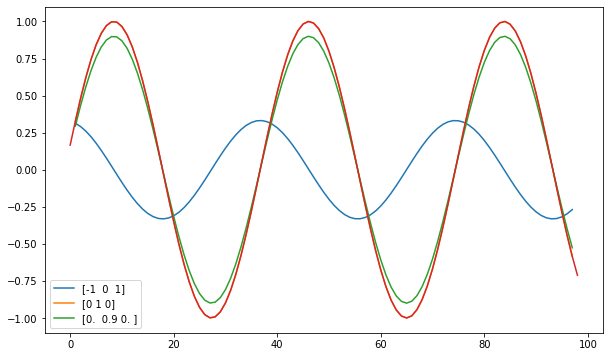

In [51]:
k1 = np.array([-1,0,1])
k2 = np.array([0,1,0])
k3 = np.array([0,0.9,0])

kernels = [k1, k2, k3]

plt.figure(figsize=(10,6))

for k in kernels:
  c = np.zeros(sin.size)
  for i in range(1, sin.size-1):
    d = sin[i-1:i+2]
    v = np.dot(d, k)
    c[i] = v

  c = np.delete(c, -1)
  c[0] = np.nan

  plt.plot(c, label=str(k))

plt.plot(sin)
plt.legend()
plt.show()

(99,)
(99,)


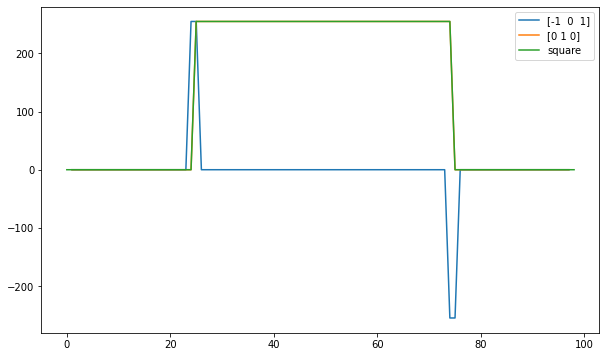

In [59]:
x = np.arange(1, 100, 1)

square = np.zeros(99)
square[25:75] = 255

print(x.shape)
print(square.shape)

k1 = np.array([-1,0,1])
k2 = np.array([0,1,0])

kernels = [k1, k2]

plt.figure(figsize=(10,6))

for k in kernels:
  c = np.zeros(square.size)
  for i in range(1, square.size-1):
    d = square[i-1:i+2]
    v = np.dot(d, k)
    c[i] = v

  c = np.delete(c, -1)
  c[0] = np.nan

  plt.plot(c, label=str(k))

plt.plot(square, label='square')
plt.legend()
plt.show()

(99,)
(99,)


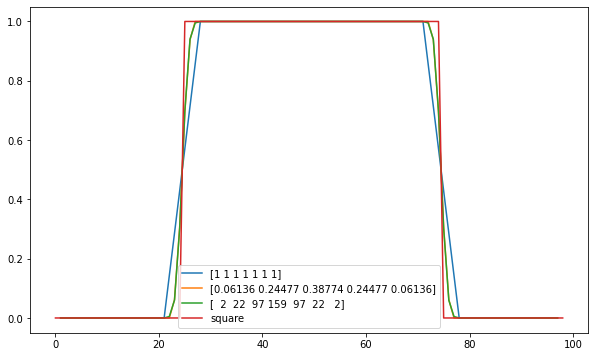

In [76]:
x = np.arange(1, 100, 1)

square = np.zeros(99)
square[25:75] = 1

print(x.shape)
print(square.shape)

k1 = np.array([1,1,1])
k2 = np.array([1,1,1,1,1])
k3 = np.array([1,1,1,1,1,1,1])
g5 = np.array([0.06136,	0.24477,	0.38774,	0.24477,	0.06136])
g7 = np.array([2,22,97,159,97,22,2])

kernels = [k1, k2, k3, g5, g7]
kernels = [k3, g5, g7]

plt.figure(figsize=(10,6))

for k in kernels:
  c = np.zeros(square.size)
  s = int((k.size-1)/2)
  for i in range(s, square.size-s):
    d = square[i-s:i+s+1]
    v = np.dot(d, k)
    c[i] = v/np.sum(k)

  c[-1] = np.nan
  c[0] = np.nan

  plt.plot(c, label=str(k))

plt.plot(square, label='square')
plt.legend()
plt.show()